# Import Packages

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

/var/folders/hk/p7fcnhm10z92trzs_9kwqlyr0000gn/T/ipykernel_49355/603194684.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = load_breast_cancer(as_frame=True)
# X_df = data[0]
# y_ds = data[1]

In [3]:
data.frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data_df = data.frame
columns = data_df.columns

In [5]:
random_seed = 5508

In [ ]:
# Support d497465762@gmail.com & wechat 497465762

# D1

In [6]:
def scatter_features(data, n=10):
    columns = data_df.columns
    for i in range(n-1):
        for j in range(i+1, n):
            col_a = columns[i]
            col_b = columns[j]
            plt.figure()
            plt.scatter(data[col_a], data[col_b], c=data[columns[-1]], alpha=0.5)
            plt.title(f'{col_a} VS {col_b}')
            plt.xlabel(col_a)
            plt.ylabel(col_b)
            
            plt.show()


In [7]:
def scatter_features(data, n=10):
    columns = data.columns
    fig, axs = plt.subplots(9, 5, figsize=(20, 20))
    
    count = 0
    for i in range(n-1):
        for j in range(i+1, n):
            col_a = columns[i]
            col_b = columns[j]
            
            # 计算当前子图的位置
            row = count // (5)
            col = count % (5)
            
            axs[row, col].scatter(data[col_a], data[col_b], c=data[columns[-1]], alpha=0.5)
            axs[row, col].set_title(f'{col_a} VS {col_b}')
            axs[row, col].set_xlabel(col_a)
            axs[row, col].set_ylabel(col_b)
            
            count += 1
            
    # 调整布局
    plt.tight_layout()
    
    plt.show()

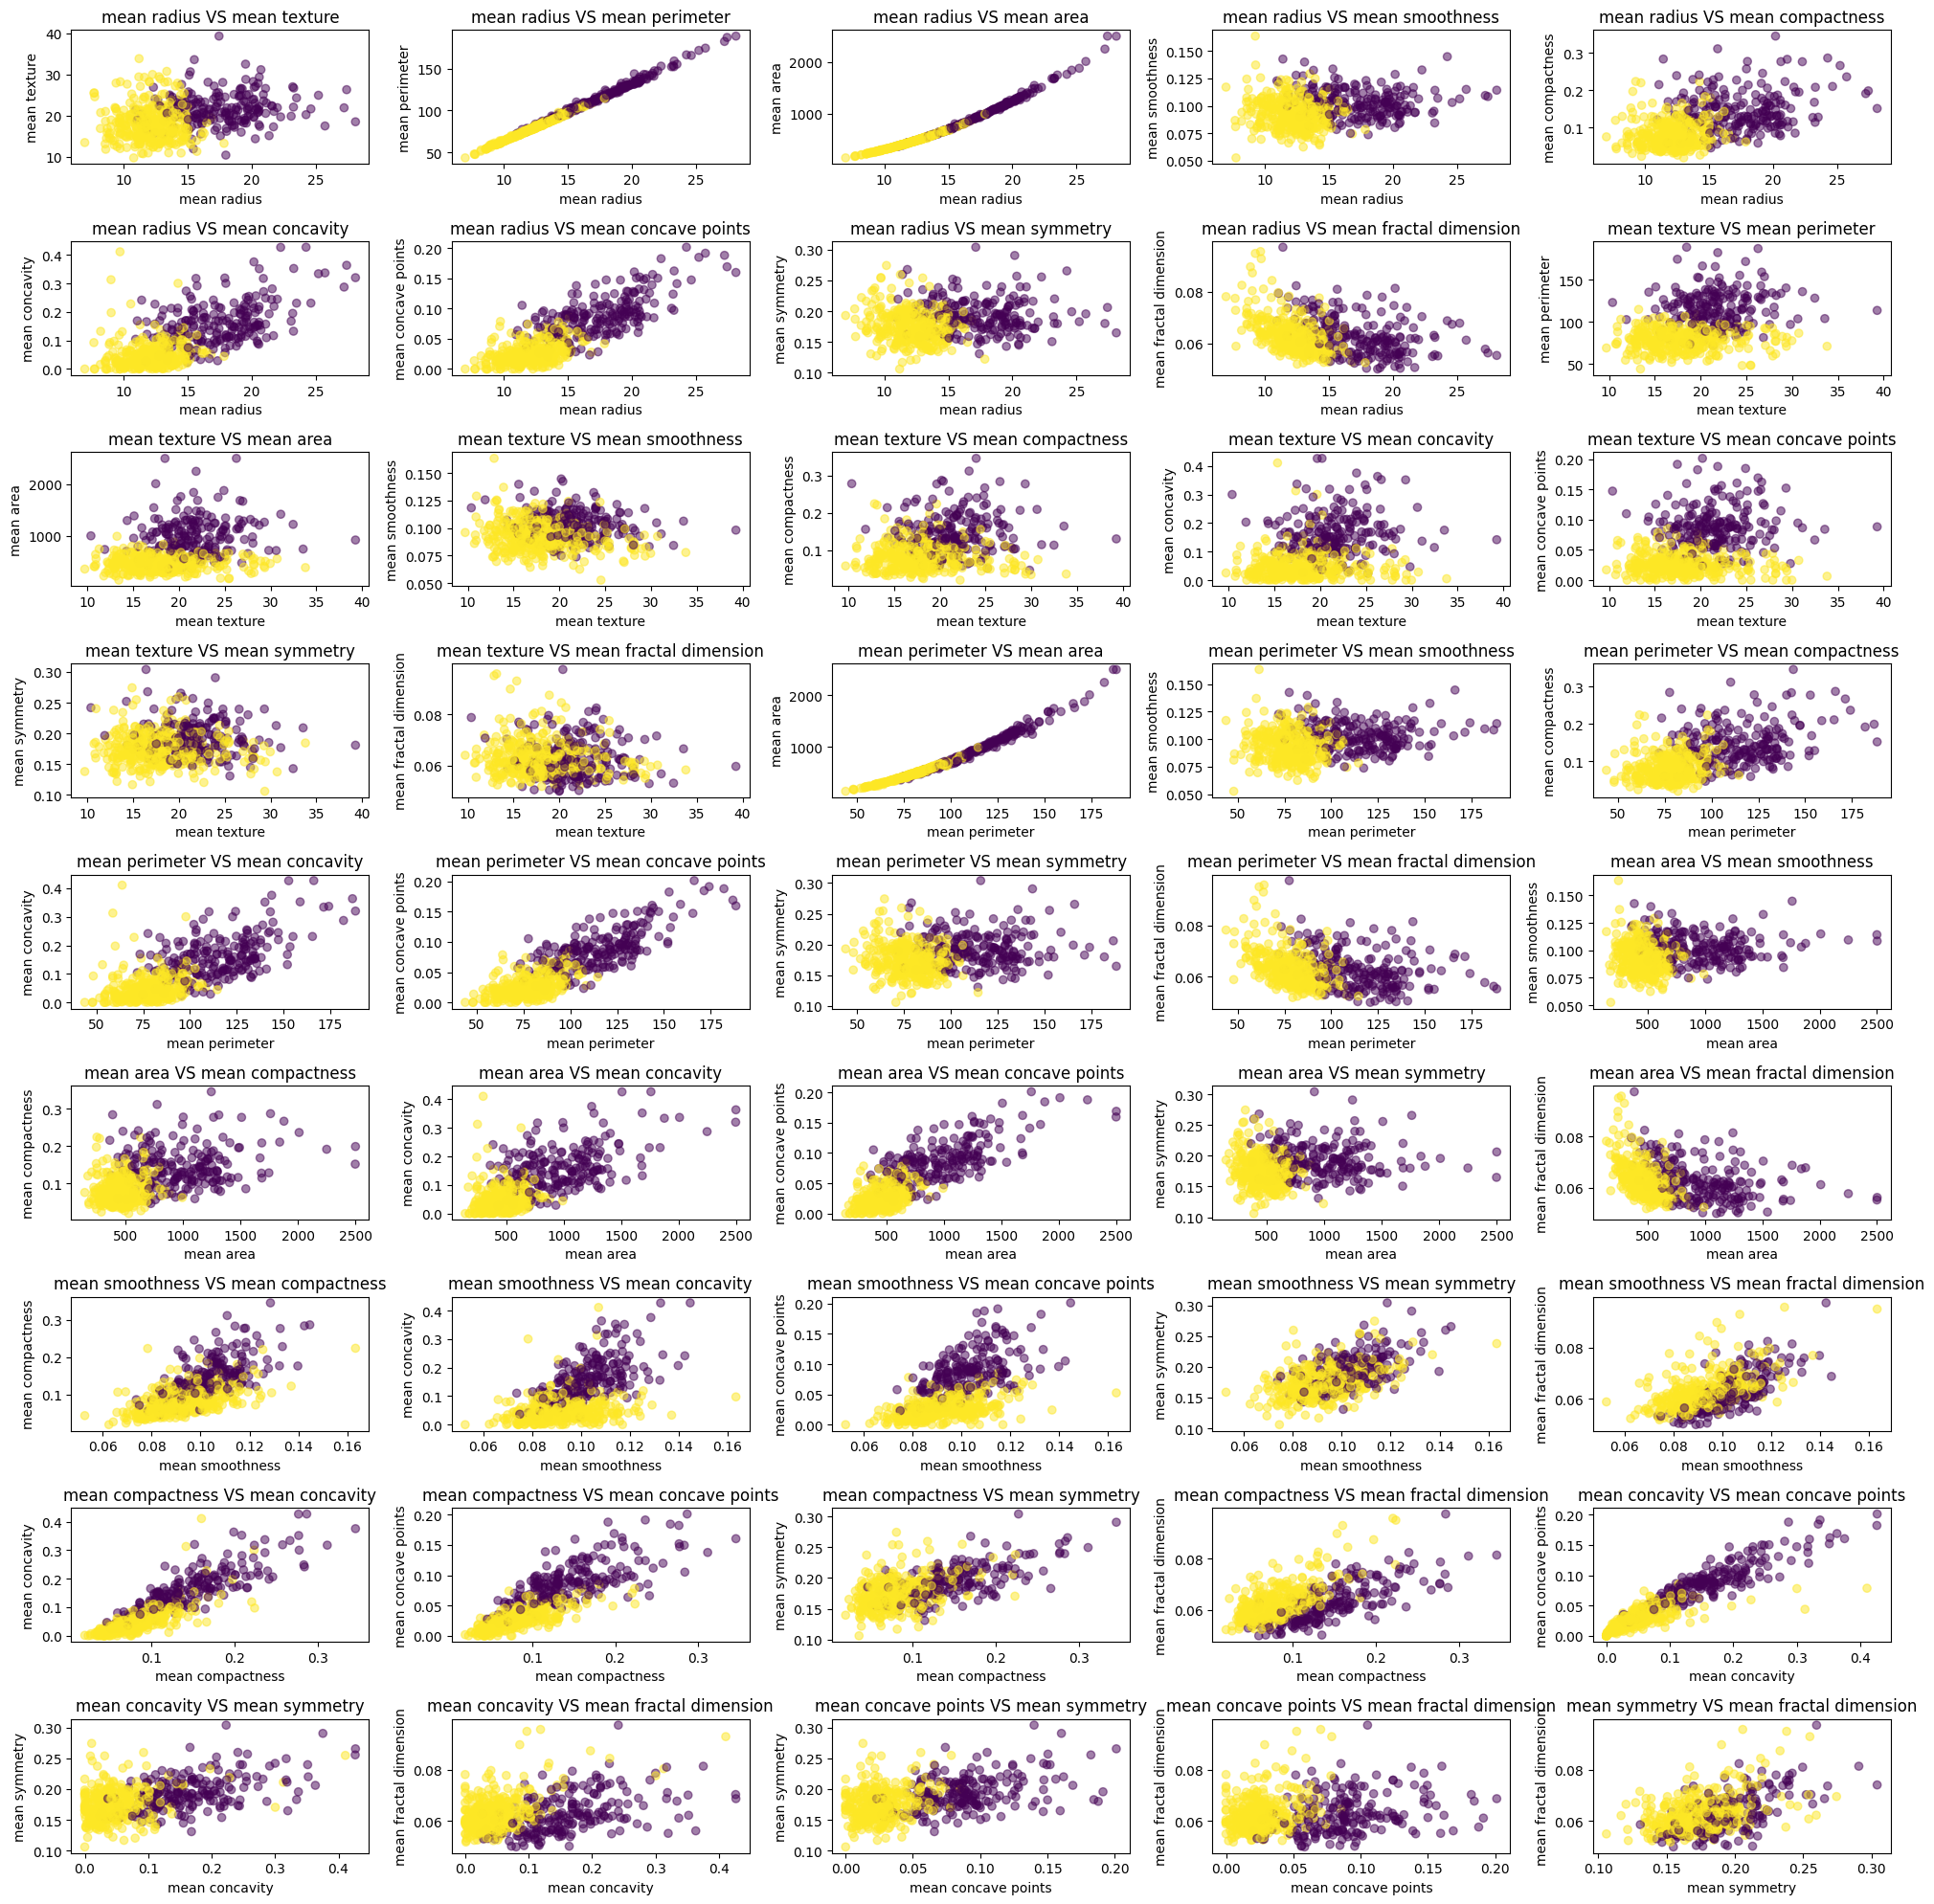

In [8]:
scatter_features(data_df, n=10)

# D2

1. Most of the features are positive correlated, few of them are negative correlated such as (mean area VS fractal dimension).  
2. There are significant clusters between target 0 and target 1.  
3. There are some outliers which can be found in plot of  (mean smoothness VS fractal dimension) and other plots.  
4. I would recommend to remove (texture error) according to these plots, because it seems that all plots with x-label (texture error) could not distinguish target from horizontal direction.

# D3

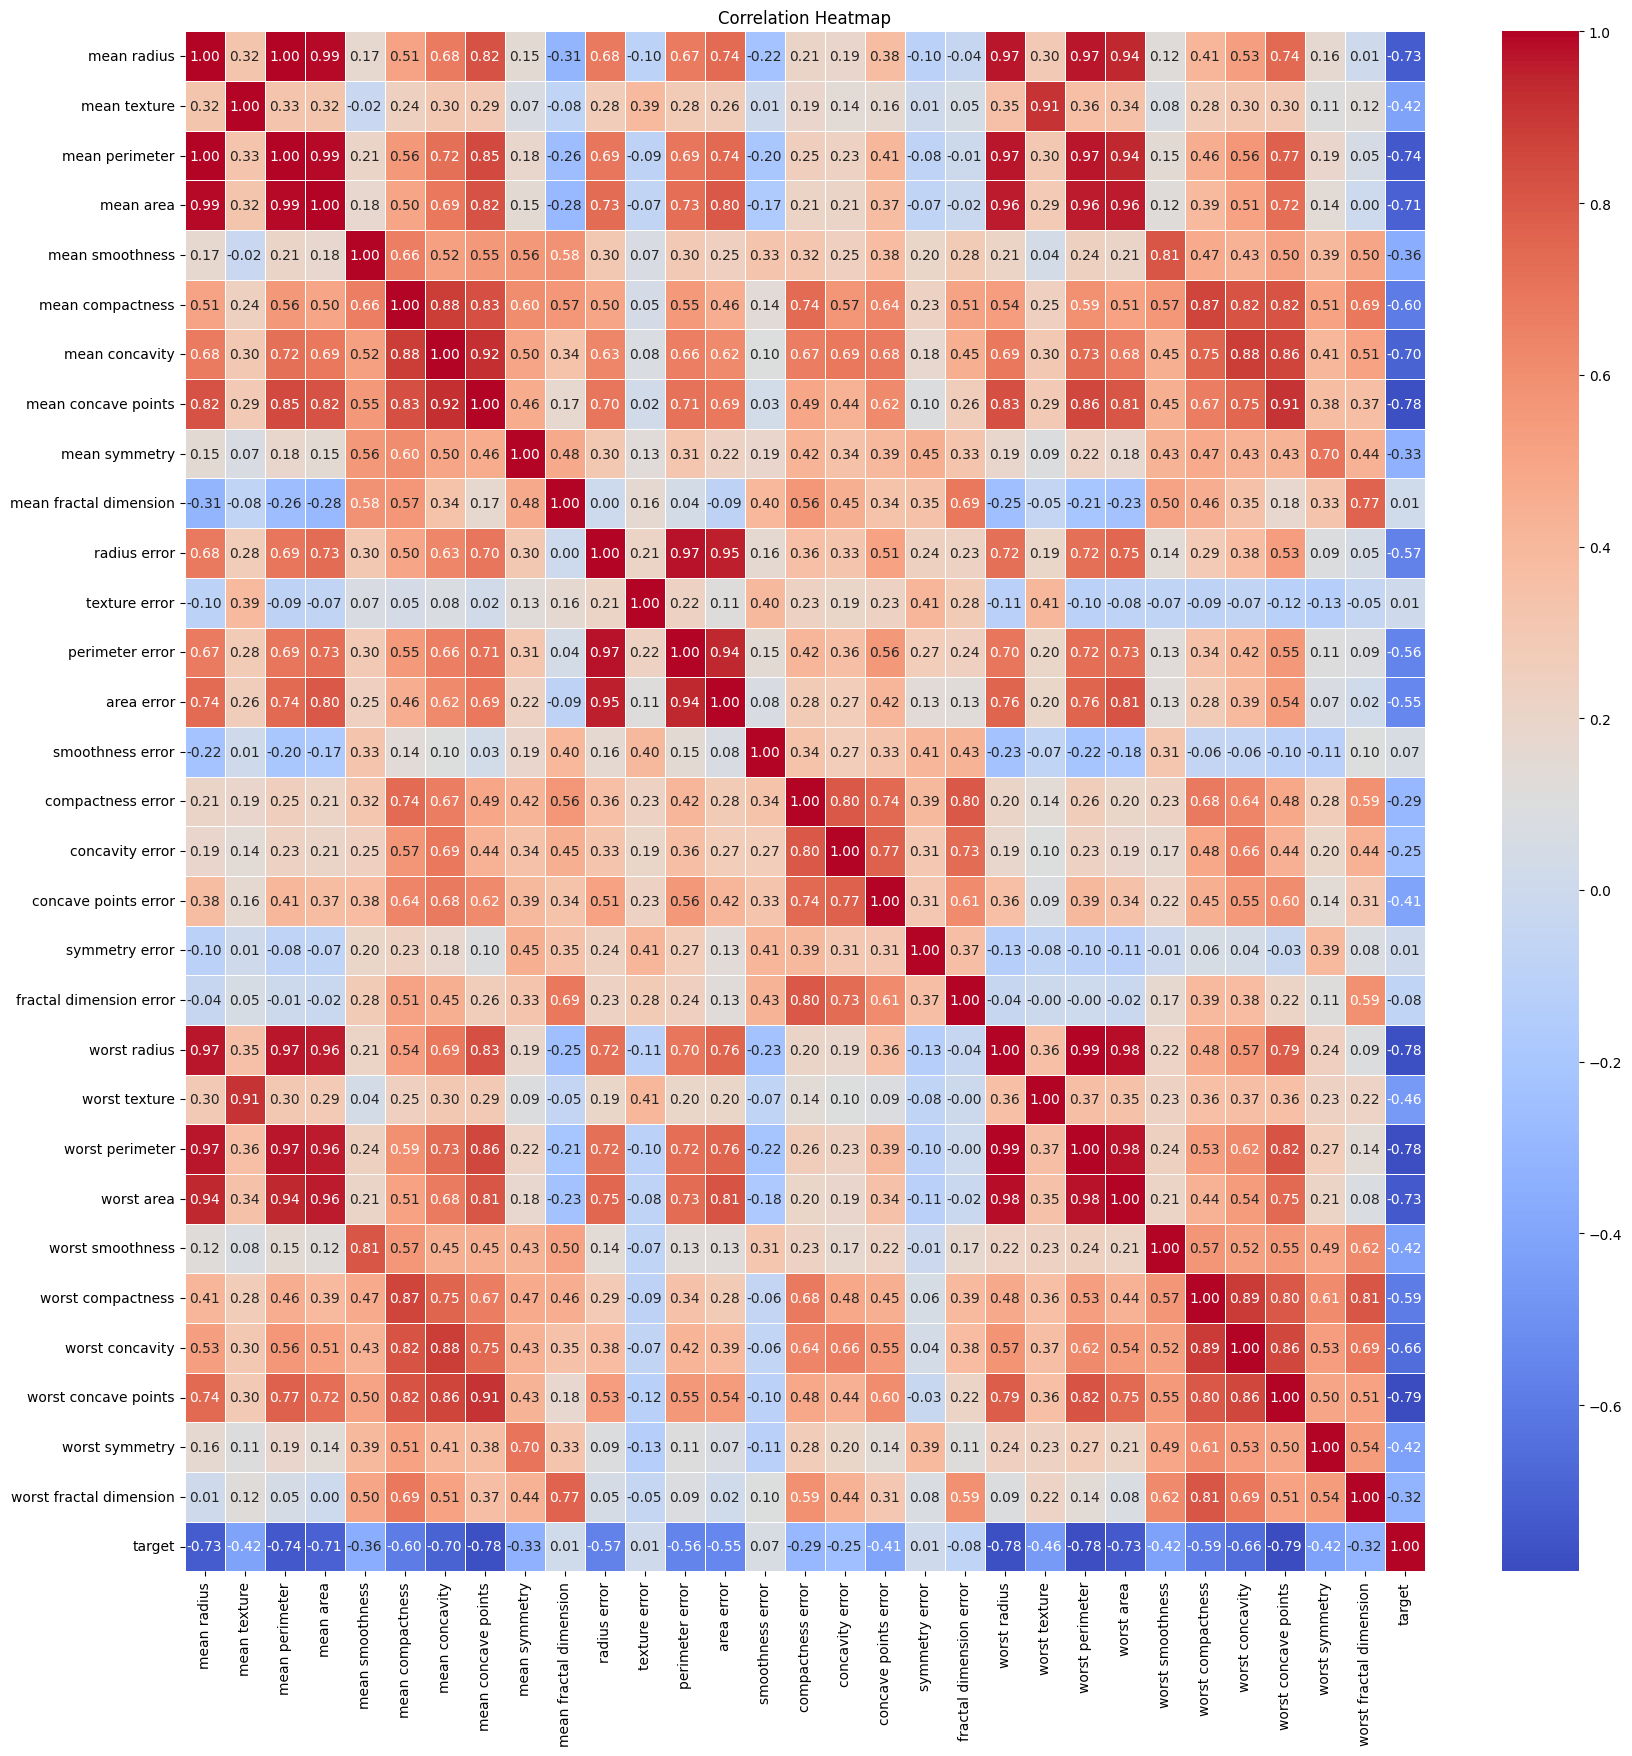

In [9]:
def plot_heatmap(data):
    features = data.columns
    plt.figure(figsize=(20, 20))
    sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')

plot_heatmap(data_df)

# D4

Yes, but I missed (mean fractal dimension), it's correlation to target is also small.

# D5

In [10]:
drop_cols = ['mean perimeter', 'mean radius', 'worst radius', 'worst perimeter', 'radius error']

data_df.drop(columns=drop_cols, inplace=True)

In [11]:
len(data_df.columns[:-1])

25

# D6

In [12]:
def train_decision_tree_default(data_df, data_seed=random_seed, model_seed=random_seed, test_size=0.2):
    # Split the data into training and test sets
    X = data_df[data_df.columns[:-1]]
    y = data_df[data_df.columns[-1]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=data_seed)

    # Initialize and train the decision tree classifier
    clf = DecisionTreeClassifier(random_state=model_seed)
    clf.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy, precision, and recall for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate confusion matrix for test set
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    return clf, train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall, conf_matrix


In [13]:
clf, train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall, conf_matrix = train_decision_tree_default(data_df)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}\n")

print(f"Training Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}\n")

print(f"Training Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")

print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 1.00
Test Accuracy: 0.93

Training Precision: 1.00
Test Precision: 0.96

Training Recall: 1.00
Test Recall: 0.93

Confusion Matrix:
[[38  3]
 [ 5 68]]


# D7

It seems the classifier is overfitting, because it's performance on test set is not as good as on train set.

# D8

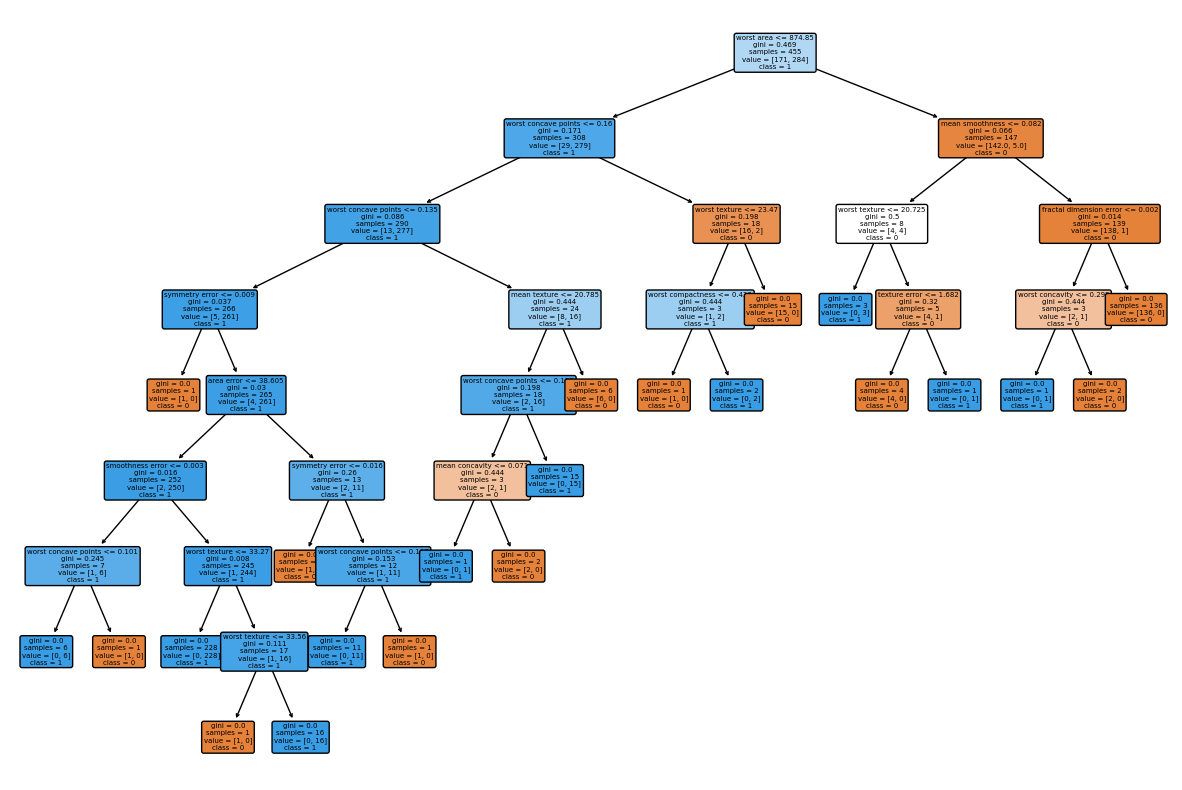

In [14]:
# Display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=data_df.columns, class_names=['0', '1'], rounded=True, fontsize=5)
plt.show()

# D9

1. There are 22 leaves.  
2. Yes, there are some signs, for example, some leaves have less samples.  
3. There gini scores are both 0.0.  
4. Yes it is, it shows every split criterion.  



In [15]:
clf.tree_.n_leaves

22

# D10

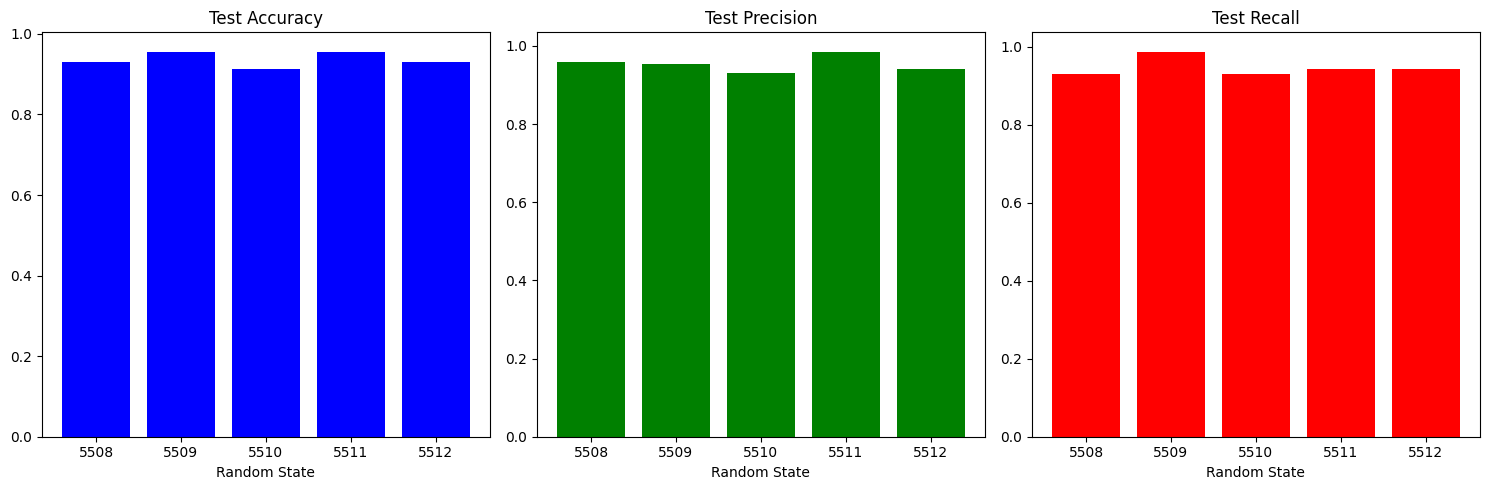

In [16]:
# set seeds
data_seeds = [5508, 5509, 5510, 5511, 5512]
test_accuracys = []
test_precisions = []
test_recalls = []

# train and predict
for data_seed in data_seeds:
    clf, train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall, conf_matrix = train_decision_tree_default(data_df, data_seed=data_seed)
    test_accuracys.append(test_accuracy)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)

# subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot Test Accuracy
axs[0].bar(data_seeds, test_accuracys, color='blue')
axs[0].set_xlabel('Random State')
axs[0].set_title('Test Accuracy')

# plot Test Precision
axs[1].bar(data_seeds, test_precisions, color='green')
axs[1].set_xlabel('Random State')
axs[1].set_title('Test Precision')

# plot Test Recall
axs[2].bar(data_seeds, test_recalls, color='red')
axs[2].set_xlabel('Random State')
axs[2].set_title('Test Recall')

plt.tight_layout()



# D11

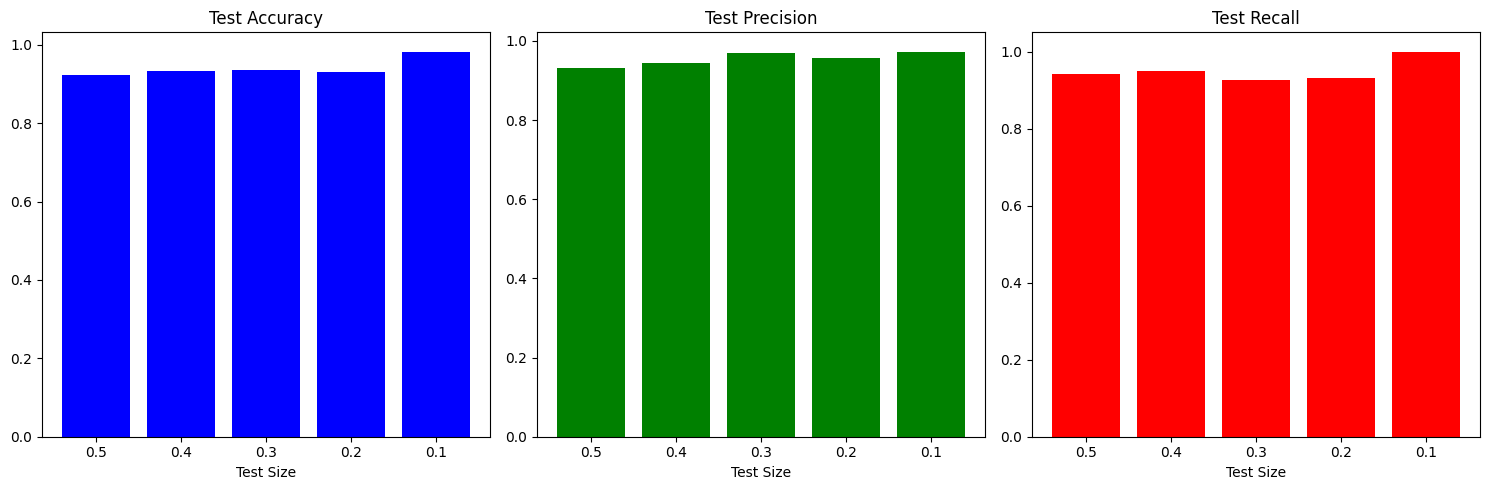

In [17]:
# set seeds
test_sizes = ['0.5', '0.4', '0.3', '0.2', '0.1']
test_accuracys = []
test_precisions = []
test_recalls = []

# train and predict
for test_size in test_sizes:
    clf, train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall, conf_matrix = train_decision_tree_default(data_df, test_size=float(test_size))
    test_accuracys.append(test_accuracy)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)

# subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot Test Accuracy
axs[0].bar(test_sizes, test_accuracys, color='blue')
axs[0].set_xlabel('Test Size')
axs[0].set_title('Test Accuracy')

# plot Test Precision
axs[1].bar(test_sizes, test_precisions, color='green')
axs[1].set_xlabel('Test Size')
axs[1].set_title('Test Precision')

# plot Test Recall
axs[2].bar(test_sizes, test_recalls, color='red')
axs[2].set_xlabel('Test Size')
axs[2].set_title('Test Recall')

plt.tight_layout()



With decending test size which means growing train size, the performance is getting better.

# D12

In [18]:
def grid_search_dt(data_df, scoring='accuracy'):
    # Create training and test sets
    X = data_df[data_df.columns[:-1]]
    y = data_df[data_df.columns[-1]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    # Define the hyperparameters grid
    param_grid = {
        'max_depth': [2, 3, 4, 5],
        'min_samples_split': [2, 4, 5, 10],
        'min_samples_leaf': [2, 5]
    }

    # Initialize Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=random_seed)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=scoring, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"")

    # Use the best model to make predictions
    best_clf = grid_search.best_estimator_
    y_train_pred = best_clf.predict(X_train)
    y_test_pred = best_clf.predict(X_test)

    # Calculate accuracy, precision, and recall for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate confusion matrix for test set
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    print(f"Best Model Training Accuracy: {train_accuracy:.2f}")
    print(f"Best Model Test Accuracy: {test_accuracy:.2f}\n")

    print(f"Best Model Training Precision: {train_precision:.2f}")
    print(f"Best Model Test Precision: {test_precision:.2f}\n")

    print(f"Best Model Training Recall: {train_recall:.2f}")
    print(f"Best Model Test Recall: {test_recall:.2f}\n")

    print("Best Model Confusion Matrix on Test Set:")
    print(conf_matrix)

    return best_clf


In [19]:
print('Scoring on Accuracy: ')
best_clf_acc = grid_search_dt(data_df, scoring='accuracy')

Scoring on Accuracy: 
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Model Training Accuracy: 0.97
Best Model Test Accuracy: 0.95

Best Model Training Precision: 0.98
Best Model Test Precision: 0.97

Best Model Training Recall: 0.98
Best Model Test Recall: 0.95

Best Model Confusion Matrix on Test Set:
[[39  2]
 [ 4 69]]


# D13

It seems that the performance on train set is not as good as before fine-tune, but the performance is getting better.  
Yes, it helps overcome overfitting.

# D14

In [20]:
print('Scoring on Precision: ')
best_clf_prs = grid_search_dt(data_df, scoring='precision')

Scoring on Precision: 
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best Model Training Accuracy: 0.99
Best Model Test Accuracy: 0.94

Best Model Training Precision: 0.99
Best Model Test Precision: 0.97

Best Model Training Recall: 0.99
Best Model Test Recall: 0.93

Best Model Confusion Matrix on Test Set:
[[39  2]
 [ 5 68]]


In [21]:
print('Scoring on Recall: ')
best_clf_rcl = grid_search_dt(data_df, scoring='recall')

Scoring on Recall: 
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Model Training Accuracy: 0.96
Best Model Test Accuracy: 0.94

Best Model Training Precision: 0.96
Best Model Test Precision: 0.96

Best Model Training Recall: 0.98
Best Model Test Recall: 0.95

Best Model Confusion Matrix on Test Set:
[[38  3]
 [ 4 69]]


It seems that when using precision as scoring argument, the classifier will get a better performance on precision, when using recall  as scoring argument, the classifier will get a better performance on recall.

# D15

In [22]:
def feature_importance_sort(clf, data):
    # Output feature importances
    feature_importances = clf.feature_importances_
    feature_names = data.columns

    # Sort feature importances
    sorted_indices = feature_importances.argsort()[::-1]
    sorted_feature_importances = feature_importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    print("Feature Importances:")
    for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
        print(f"{feature_name}: {importance:.2f}")

In [23]:
feature_importance_sort(best_clf_acc, data_df)

Feature Importances:
worst area: 0.78
worst concave points: 0.15
mean texture: 0.04
mean smoothness: 0.02
area error: 0.01
smoothness error: 0.00
mean area: 0.00
mean compactness: 0.00
mean concavity: 0.00
mean concave points: 0.00
mean symmetry: 0.00
mean fractal dimension: 0.00
texture error: 0.00
perimeter error: 0.00
worst fractal dimension: 0.00
worst symmetry: 0.00
concavity error: 0.00
concave points error: 0.00
symmetry error: 0.00
fractal dimension error: 0.00
worst texture: 0.00
worst smoothness: 0.00
worst compactness: 0.00
worst concavity: 0.00
compactness error: 0.00


# D16

In [24]:
def feature_select(clf, data):
    sfm = SelectFromModel(clf, threshold=0.005)
    selected_features = data.columns[sfm.get_support(indices=True)]
    feature_importances = clf.feature_importances_
    selected_features_importance = feature_importances[sfm.get_support(indices=True)]

    # Sort feature importances
    sorted_indices = selected_features_importance.argsort()[::-1]
    sorted_feature_importances = selected_features_importance[sorted_indices]
    sorted_feature_names = selected_features[sorted_indices]

    print("Retained Features and Importances:")
    for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
        print(f"{feature_name}: {importance:.2f}")

    return selected_features

In [25]:
selected_features = feature_select(best_clf_acc, data_df)

Retained Features and Importances:
worst area: 0.78
worst concave points: 0.15
mean texture: 0.04
mean smoothness: 0.02
area error: 0.01


# D17

I would repeat the cross-validation process to find the optimal hyperparameters, because I want to compare best models performance on different features.

In [26]:
data_reduced = data_df[selected_features.to_list()+['target']]
data_reduced.head()

,mean texture,mean smoothness,area error,worst area,worst concave points,target
0,10.38,0.11840,153.40,2019.0,0.2654,0
1,17.77,0.08474,74.08,1956.0,0.1860,0
2,21.25,0.10960,94.03,1709.0,0.2430,0
3,20.38,0.14250,27.23,567.7,0.2575,0
4,14.34,0.10030,94.44,1575.0,0.1625,0


In [27]:
# Train and Predict on Reduced Data and Get Best Model
print('Train and Predict on Reduced Data and Get Best Model:')
best_clf_reduced = grid_search_dt(data_reduced, scoring='accuracy')

Train and Predict on Reduced Data and Get Best Model:
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Model Training Accuracy: 0.97
Best Model Test Accuracy: 0.95

Best Model Training Precision: 0.98
Best Model Test Precision: 0.97

Best Model Training Recall: 0.98
Best Model Test Recall: 0.95

Best Model Confusion Matrix on Test Set:
[[39  2]
 [ 4 69]]


In [28]:
# Train and Predict on Whole Data and Get Best Model
print('Train and Predict on Whole Data and Get Best Model:')
best_clf = grid_search_dt(data_df, scoring='accuracy')

Train and Predict on Whole Data and Get Best Model:
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Model Training Accuracy: 0.97
Best Model Test Accuracy: 0.95

Best Model Training Precision: 0.98
Best Model Test Precision: 0.97

Best Model Training Recall: 0.98
Best Model Test Recall: 0.95

Best Model Confusion Matrix on Test Set:
[[39  2]
 [ 4 69]]


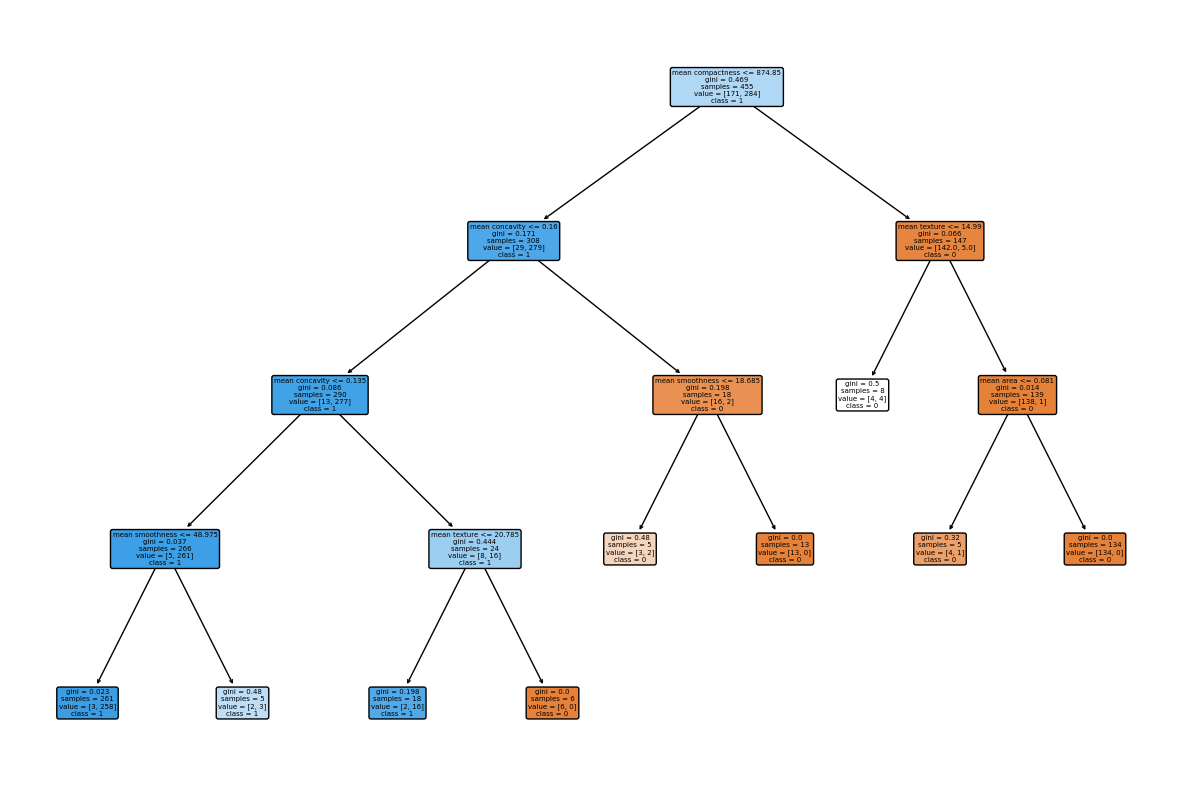

In [29]:
# Display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_clf_reduced, filled=True, feature_names=data_df.columns, class_names=['0', '1'], rounded=True, fontsize=5)
plt.show()

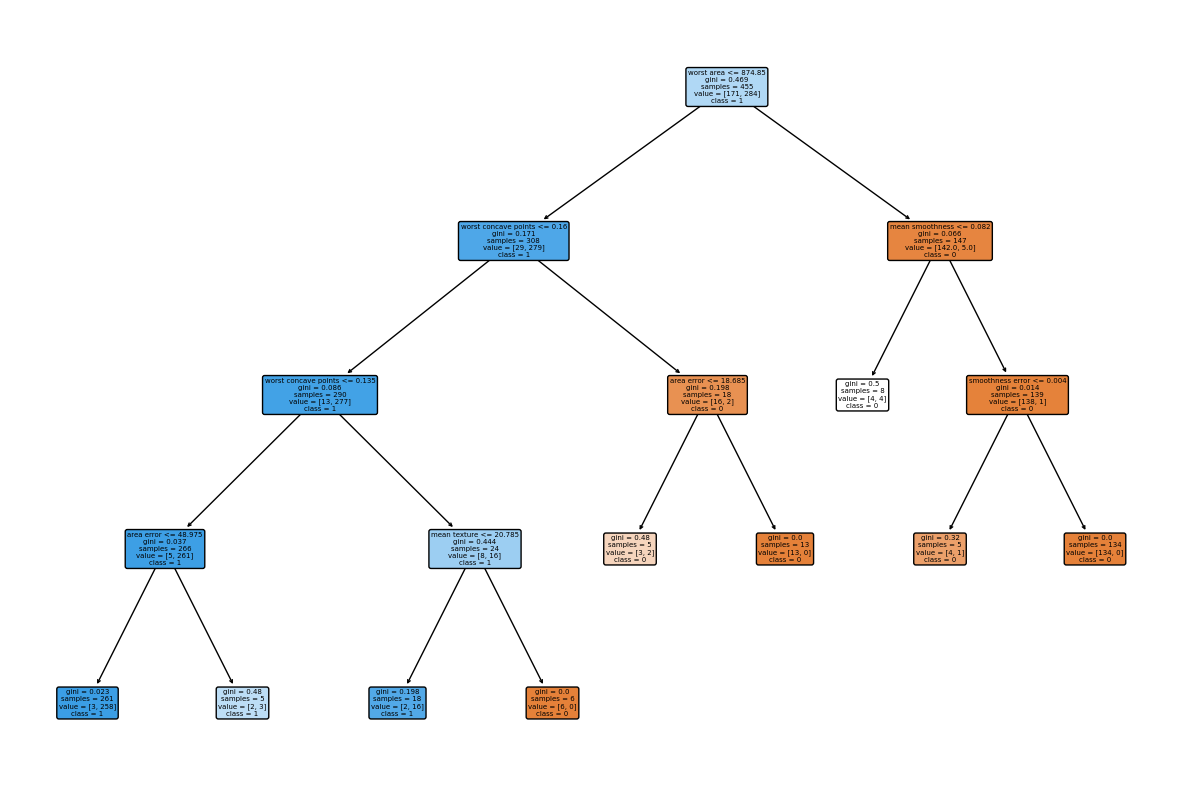

In [30]:
# Display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_clf, filled=True, feature_names=data_df.columns, class_names=['0', '1'], rounded=True, fontsize=5)
plt.show()

In [31]:
feature_importance_sort(best_clf_reduced, data_reduced)

Feature Importances:
worst area: 0.78
worst concave points: 0.15
mean texture: 0.06
area error: 0.01
mean smoothness: 0.00


In [32]:
feature_importance_sort(best_clf, data_df)

Feature Importances:
worst area: 0.78
worst concave points: 0.15
mean texture: 0.04
mean smoothness: 0.02
area error: 0.01
smoothness error: 0.00
mean area: 0.00
mean compactness: 0.00
mean concavity: 0.00
mean concave points: 0.00
mean symmetry: 0.00
mean fractal dimension: 0.00
texture error: 0.00
perimeter error: 0.00
worst fractal dimension: 0.00
worst symmetry: 0.00
concavity error: 0.00
concave points error: 0.00
symmetry error: 0.00
fractal dimension error: 0.00
worst texture: 0.00
worst smoothness: 0.00
worst compactness: 0.00
worst concavity: 0.00
compactness error: 0.00


# D18

1. Feature importances changed.  
2. Split criterions of each node are different.

# D19

In [33]:
def grid_search_rf(data_df, scoring='accuracy'):
    # Create training and test sets
    X = data_df[data_df.columns[:-1]]
    y = data_df[data_df.columns[-1]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    # Define the hyperparameters grid
    param_grid = {
        'max_depth': [2, 3, 4, 5],
        'n_estimators': [10, 20, 50, 100, 1000]
    }

    # Initialize Decision Tree Classifier
    clf = RandomForestClassifier(random_state=random_seed)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=scoring, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"")

    # Use the best model to make predictions
    best_clf = grid_search.best_estimator_
    y_train_pred = best_clf.predict(X_train)
    y_test_pred = best_clf.predict(X_test)

    # Calculate accuracy, precision, and recall for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate confusion matrix for test set
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    print(f"Best Model Training Accuracy: {train_accuracy:.2f}")
    print(f"Best Model Test Accuracy: {test_accuracy:.2f}\n")

    print(f"Best Model Training Precision: {train_precision:.2f}")
    print(f"Best Model Test Precision: {test_precision:.2f}\n")

    print(f"Best Model Training Recall: {train_recall:.2f}")
    print(f"Best Model Test Recall: {test_recall:.2f}\n")

    print("Best Model Confusion Matrix on Test Set:")
    print(conf_matrix)

    return best_clf


In [34]:
best_rf = grid_search_rf(data_df, scoring='accuracy')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters: {'max_depth': 4, 'n_estimators': 20}

Best Model Training Accuracy: 0.99
Best Model Test Accuracy: 0.98

Best Model Training Precision: 0.98
Best Model Test Precision: 0.99

Best Model Training Recall: 1.00
Best Model Test Recall: 0.99

Best Model Confusion Matrix on Test Set:
[[40  1]
 [ 1 72]]


# D20

The performance of random forest is better than decision tree.  
Random forest use multiple trees and average there predictions to get better results.  
Yes, it helps improve the performance and overcome overfitting.

# D21

1. Based on this dataset it seems the model is strong enough, but I don't know if there are any bias between this dataset and real population. So I could not make the decision.  
2. That depends. This dataset is relatively simple, the distributions of features and target are pretty clear. But if there's a more complicated dataset, we may need a more complex model.  
3. For this task, ML is a good idea. But for now we could not make it automated. Because we still need to do EDA works, overcome overfitting. That's a long way to go.  
4. The dataset is relatively simple and clean.